In [98]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

m = 10  # Number of data points
np.random.seed(42)  # For reproducibility
size = np.random.randint(40, 100, m) * np.float64(1.0)
rent = size * m + np.random.normal(0, 100, m).astype(np.float64)

In [96]:
def cost_function(w: float, b: float) -> np.float64:
    """Calculate the cost J(w, b) for linear regression."""
    m = rent.size
    predictions = w * size + b
    return np.float64((1 / (2 * m)) * np.sum((predictions - rent) ** 2))

def dCostdw(w: float, b: float) -> np.float64:
    """Calculate the gradient of the cost function with respect to w."""
    m = rent.size
    predictions = w * size + b
    return np.float64((1 / m) * np.sum((predictions - rent) * size))

def dCostdb(w: float, b: float) -> np.float64:
    """Calculate the gradient of the cost function with respect to b."""
    m = rent.size
    predictions = w * size + b
    return np.float64((1 / m) * np.sum(predictions - rent))

def gradient_descent(w: float, b: float, alpha: float, num_iterations: int) -> tuple[float, float]:
    """Perform gradient descent to minimize the cost function."""
    for _ in range(num_iterations):
        w -= alpha * dCostdw(w, b)
        b -= alpha * dCostdb(w, b)
    return w, b

In [102]:
# Save stats
size_mu = size.mean()
size_sigma = size.std()
rent_mu = rent.mean()
rent_sigma = rent.std()

# Normalize
size_norm = (size - size_mu) / size_sigma
rent_norm = (rent - rent_mu) / rent_sigma

# Train
w_norm, b_norm = gradient_descent(w=0.0, b=0.0, alpha=0.001, num_iterations=10000)

# Convert to original scale
w_orig = w_norm * (rent_sigma / size_sigma)
b_orig = rent_mu + rent_sigma * (b_norm - w_norm * size_mu / size_sigma)

print(f"Original scale parameters: w = {w_orig}, b = {b_orig}")


Original scale parameters: w = nan, b = nan


/tmp/ipykernel_205618/4264529792.py:10: RuntimeWarning: invalid value encountered in add
  predictions = w * size + b


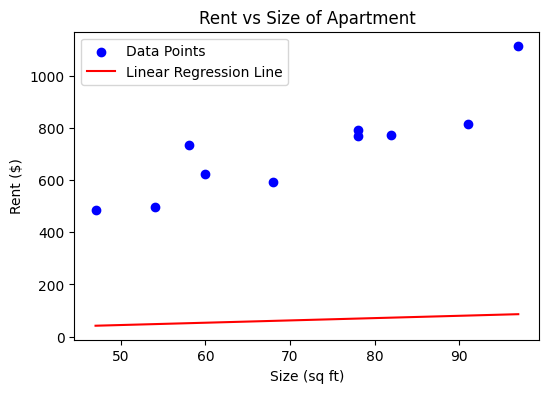

In [100]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(size, rent, color='blue', label='Data Points')
ax.set_xlabel('Size (sq ft)')
ax.set_ylabel('Rent ($)')
ax.set_title('Rent vs Size of Apartment')

x_range = np.linspace(size.min(), size.max(), 100)
y_range = w_orig * x_range + b_orig
ax.plot(x_range, y_range, color='red', label='Linear Regression Line')
ax.legend()
plt.show()